# ODE数値実験

## ユーティリティ定義

In [1]:
def get_datafilename(dpath):
	import os.path, glob
	spath = os.path.expanduser(dpath)
	if not os.path.isdir(spath):
		raise RuntimeError
	spath = os.path.join(spath, '*/logs')
	return glob.glob(spath)

def parse_datafile(path, col='test'):
	result = []
	with open(path, 'r') as fd:
		for l in fd:
			m = re.match(r'Epoch (?P<epoch>\d*) \| .* \| Train Acc (?P<train>[\d.]*) \| Test Acc (?P<test>[\d.]*)', l)
			if not m:
				continue
			result.append(float(m.group(col)))
	return result

## ResNetでレイヤー数を変化させたときの性能比較
* データセット：F/MNIST
* レイヤー数が増えていったときにODENetへ漸近していくはず
* 160エポックまで学習した時点の正答率を10回計算して平均を算出
* それを中間のレイヤー数0から9まで変化させてプロット
* グラフは横軸がレイヤー数、縦軸が正解率
* カラフルな点が実データ、菱形が平均、エラーバーはデータの95%信頼区間

### アジョント法で学習を進めたとき

<IPython.core.display.Javascript object>


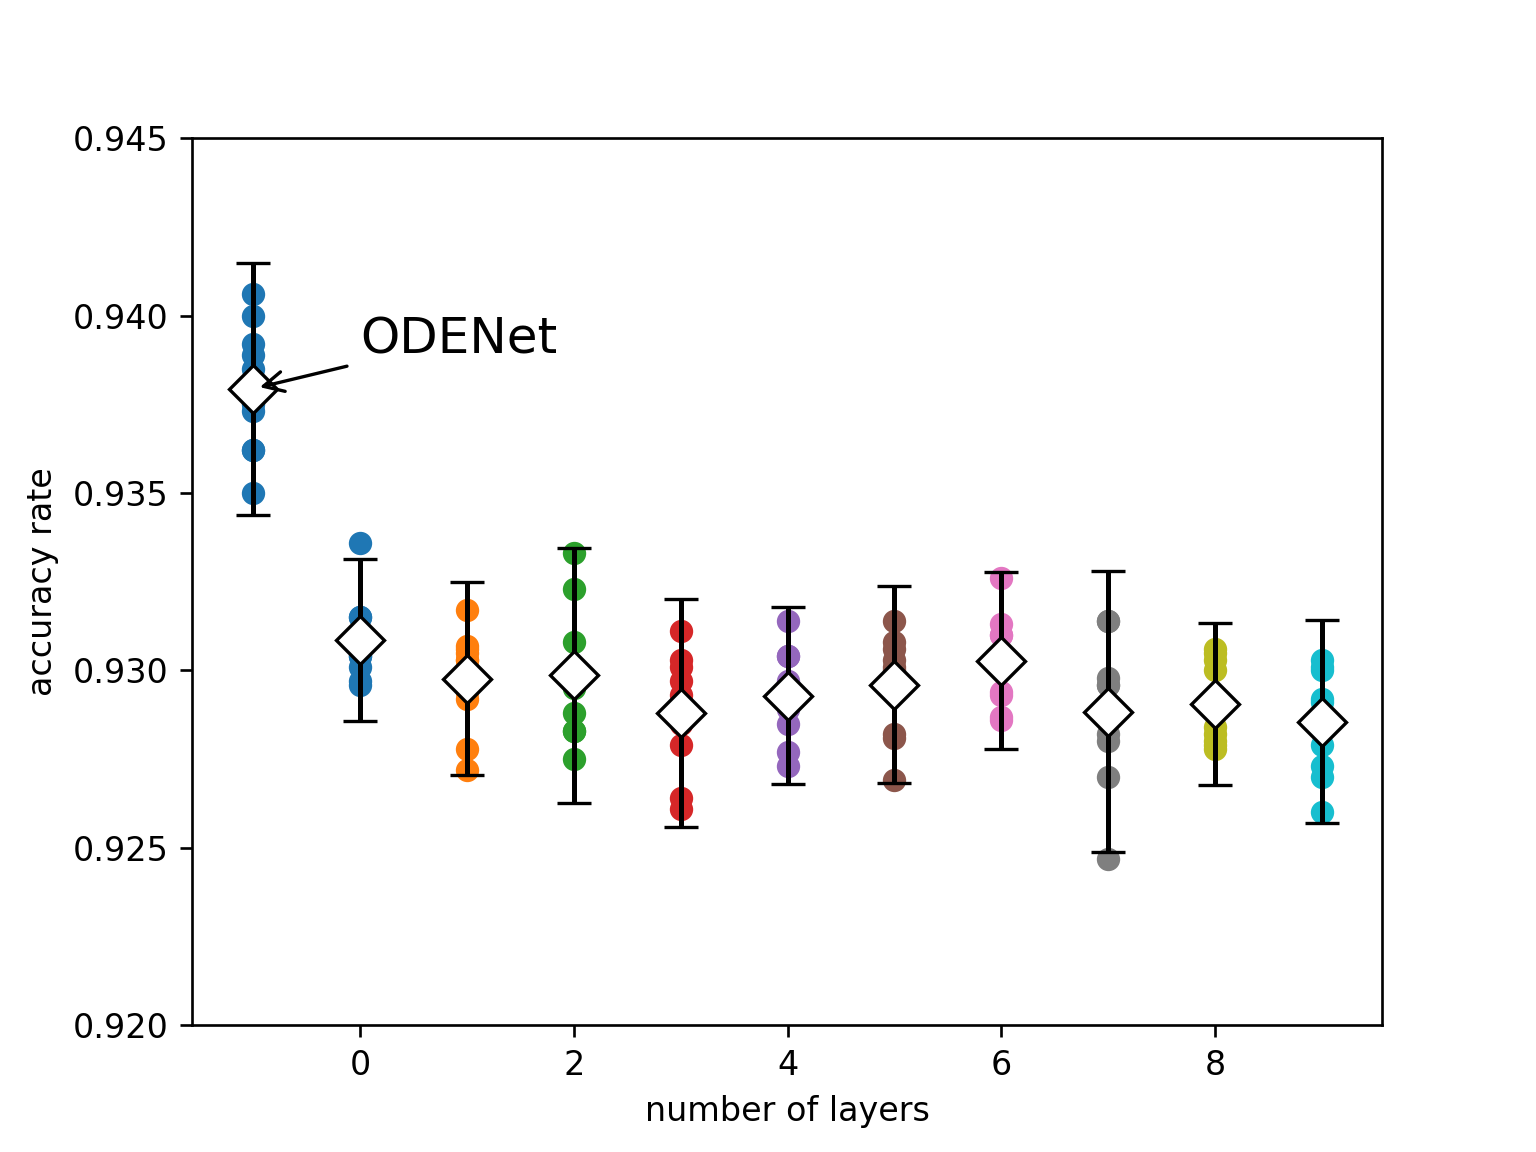

In [3]:
%matplotlib notebook

DATADIR='201910021626'
ODEDATA='201910161626'

import pandas
import re
import matplotlib.pyplot as plt


### ResNet
pda = []
files = map(lambda x: re.search('layer(?P<layer>\d*)-try(?P<try>\d*)', x), get_datafilename(DATADIR))
files = sorted(list(files), key=lambda x: int(x.group('layer')+x.group('try')))
for fpath in files:
	path = fpath.string
	layer = fpath.group('layer')
	tries = fpath.group('try')
	result = parse_datafile(path)
	pda.append(pandas.Series(result, name='L'+layer+'-T'+tries))
pd = pandas.DataFrame(pda).T

for layer in range(10):
	fpd = pd.filter(regex='L'+str(layer)+'-').iloc[-1]
	plt.errorbar(layer, fpd.mean(), 1.96*fpd.std(), ecolor='black', fmt='D', markeredgecolor='black', color='white', markersize=10, capsize=5)
	plt.scatter([layer]*len(fpd), fpd)


### ODENet
pda = []
files = map(lambda x: re.search('try(?P<try>\d*)', x), get_datafilename(ODEDATA))
files = sorted(list(files), key=lambda x: int(x.group('try')))
for fpath in files:
	path = fpath.string
	tries = fpath.group('try')
	result = parse_datafile(path)
	pda.append(pandas.Series(result, name='T'+tries))
pd = pandas.DataFrame(pda).T

fpd = pd.iloc[-1]
plt.errorbar(-1, fpd.mean(), 1.96*fpd.std(), ecolor='black', fmt='D', markeredgecolor='black', color='white', markersize=10, capsize=5)
plt.scatter([-1]*len(fpd), fpd)
plt.annotate("ODENet", (-1, fpd.mean()), xytext=(0, fpd.mean()+0.001), size = 15, arrowprops={'arrowstyle':'->'})

### Plot Setting
plt.ylim(0.92, 0.945)
plt.xlabel('number of layers')
plt.ylabel('accuracy rate')

plt.show()

### BP法で学習を進めたとき

<IPython.core.display.Javascript object>


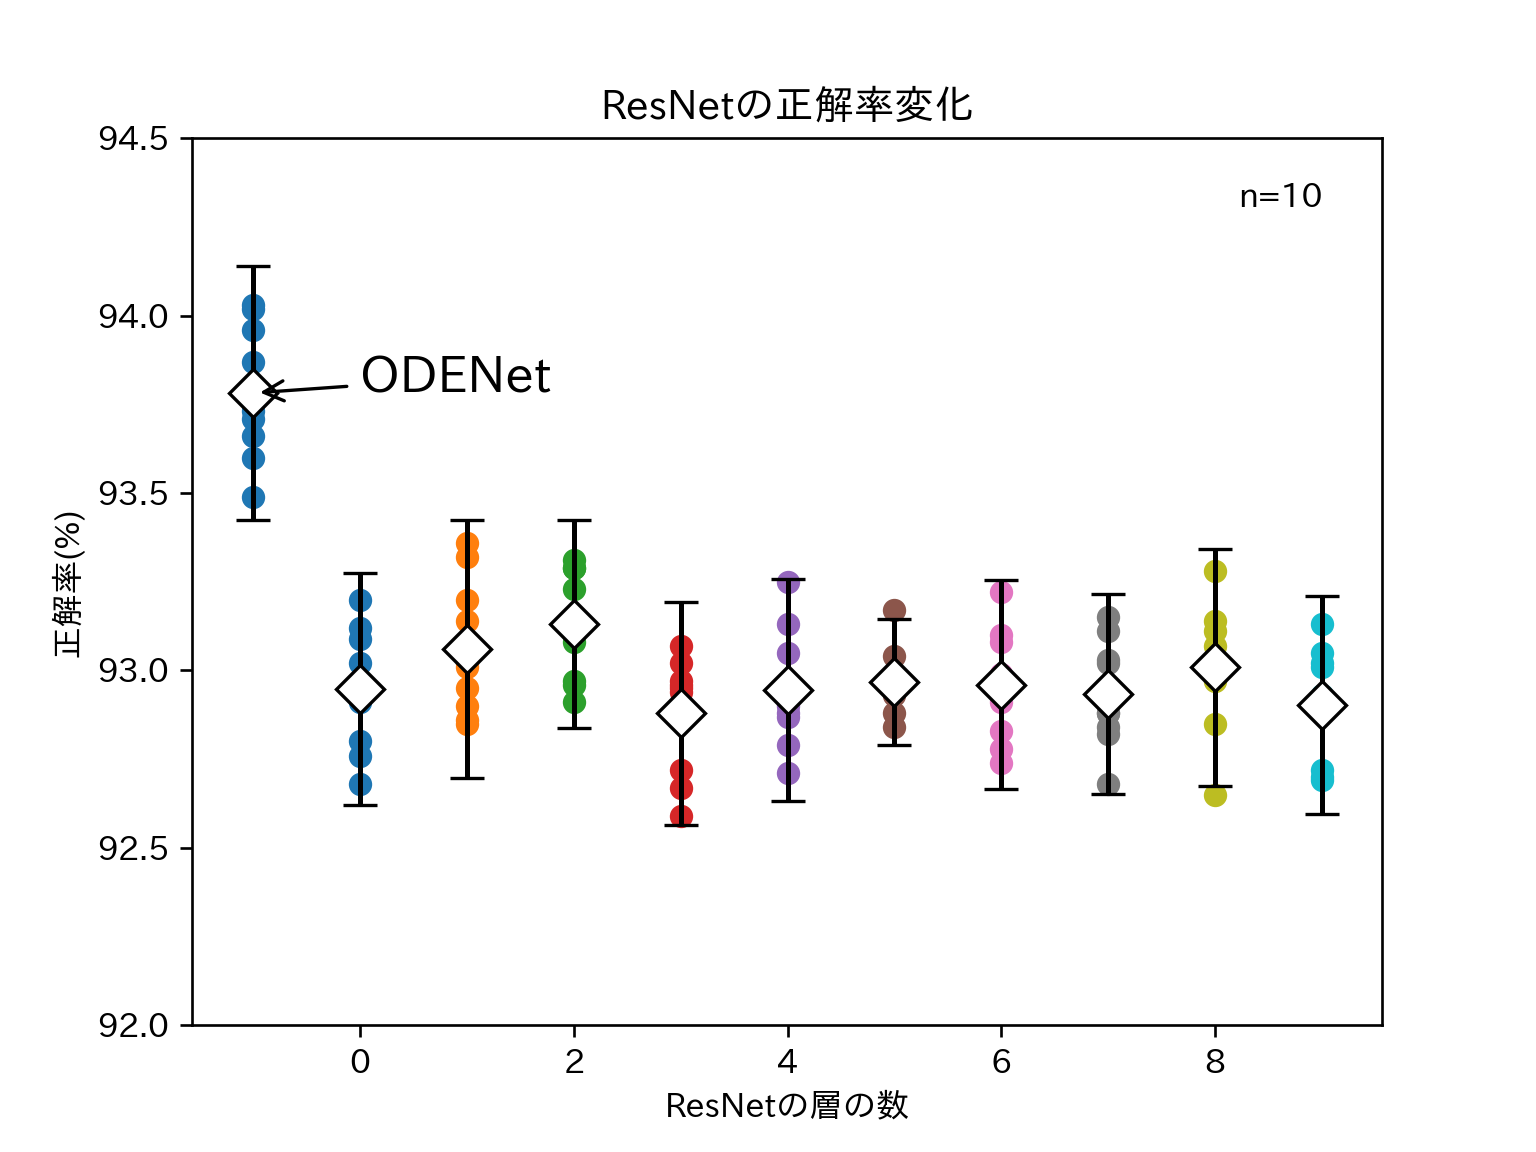

In [3]:
%matplotlib notebook

DATADIR='201910041624'
ODEDATA='201910062002'

import pandas
import re
import matplotlib.pyplot as plt
import japanize_matplotlib


### ResNet
pda = []
files = map(lambda x: re.search('layer(?P<layer>\d*)-try(?P<try>\d*)', x), get_datafilename(DATADIR))
files = sorted(list(files), key=lambda x: int(x.group('layer')+x.group('try')))
for fpath in files:
	path = fpath.string
	layer = fpath.group('layer')
	tries = fpath.group('try')
	result = parse_datafile(path)
	pda.append(pandas.Series(result, name='L'+layer+'-T'+tries))
pd = pandas.DataFrame(pda).T

for layer in range(10):
	fpd = pd.filter(regex='L'+str(layer)+'-').iloc[-1]
	plt.errorbar(layer, fpd.mean()*100, 1.96*fpd.std()*100, ecolor='black', fmt='D', markeredgecolor='black', color='white', markersize=10, capsize=5)
	plt.scatter([layer]*len(fpd), fpd*100)


### ODENet
pda = []
files = map(lambda x: re.search('try(?P<try>\d*)', x), get_datafilename(ODEDATA))
files = sorted(list(files), key=lambda x: int(x.group('try')))
for fpath in files:
	path = fpath.string
	tries = fpath.group('try')
	result = parse_datafile(path)
	pda.append(pandas.Series(result, name='T'+tries))
pd = pandas.DataFrame(pda).T

fpd = pd.iloc[-1]
plt.errorbar(-1, fpd.mean()*100, 1.96*fpd.std()*100, ecolor='black', fmt='D', markeredgecolor='black', color='white', markersize=10, capsize=5)
plt.scatter([-1]*len(fpd), fpd*100)
plt.annotate("ODENet", (-1, fpd.mean()*100), xytext=(0, fpd.mean()*100+0.001), size = 15, arrowprops={'arrowstyle':'->'})

### Plot Setting
plt.ylim(92, 94.5)
#plt.xlabel('number of layers')
#plt.ylabel('accuracy rate')
plt.xlabel('ResNetの層の数')
plt.ylabel('正解率(%)')
plt.text(.95, .95, 'n=10', ha='right', va='top', transform=plt.gca().transAxes)
plt.title('ResNetの正解率変化')

plt.show()

#from matplotlib.backends.backend_pdf import PdfPages
#pp = PdfPages('/tmp/graph.pdf')
#pp.savefig()
#pp.close()

### BP法で学習を進め、更に多層化した

In [6]:
%matplotlib widget

DATADIR='201910231727'
ODEDATA='201910062002'

import pandas
import re
import matplotlib.pyplot as plt
import japanize_matplotlib


### ResNet
pda = []
files = map(lambda x: re.search('layer(?P<layer>\d*)-try(?P<try>\d*)', x), get_datafilename(DATADIR))
files = sorted(list(files), key=lambda x: int(x.group('layer')+x.group('try')))
for fpath in files:
	path = fpath.string
	layer = fpath.group('layer')
	tries = fpath.group('try')
	result = parse_datafile(path)
	pda.append(pandas.Series(result, name='L'+layer+'-T'+tries))
pd = pandas.DataFrame(pda).T

for layer in range(10, 50, 10):
	fpd = pd.filter(regex='L'+str(layer)+'-').iloc[-1]
	plt.errorbar(layer, fpd.mean()*100, 1.96*fpd.std()*100, ecolor='black', fmt='D', markeredgecolor='black', color='white', markersize=10, capsize=5)
	plt.scatter([layer]*len(fpd), fpd*100)


### ODENet
pda = []
files = map(lambda x: re.search('try(?P<try>\d*)', x), get_datafilename(ODEDATA))
files = sorted(list(files), key=lambda x: int(x.group('try')))
for fpath in files:
	path = fpath.string
	tries = fpath.group('try')
	result = parse_datafile(path)
	pda.append(pandas.Series(result, name='T'+tries))
pd = pandas.DataFrame(pda).T

fpd = pd.iloc[-1]
plt.errorbar(-1, fpd.mean()*100, 1.96*fpd.std()*100, ecolor='black', fmt='D', markeredgecolor='black', color='white', markersize=10, capsize=5)
plt.scatter([-1]*len(fpd), fpd*100)
plt.annotate("ODENet", (-1, fpd.mean()*100), xytext=(0, fpd.mean()*100+0.001), size = 15, arrowprops={'arrowstyle':'->'})

### Plot Setting
plt.ylim(92, 94.5)
#plt.xlabel('number of layers')
#plt.ylabel('accuracy rate')
plt.xlabel('ResNetの層の数')
plt.ylabel('正解率(%)')
plt.text(.95, .95, 'n=10', ha='right', va='top', transform=plt.gca().transAxes)
plt.title('ResNetの正解率変化')

plt.show()

#from matplotlib.backends.backend_pdf import PdfPages
#pp = PdfPages('/tmp/graph.pdf')
#pp.savefig()
#pp.close()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …